In [8]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
import load_cifar_template as lc
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
import time

In [2]:
tf.reset_default_graph()

<h1>Hyperparameter</h1>

In [3]:
#learning rate
lr = 0.0007
#number of traning steps
num_steps = 10
#number of batch_size
batch_size = 50
#num_input = 784
num_classes = 10

num_train_batches = int(55000 / batch_size)
num_valid_batches = int(5000 / batch_size)
num_test_batches = int(10000 / batch_size)



In [4]:
folder_path = "CIFAR"
lc.preprocess_data(folder_path, True)

<h1>Placeholder</h1>

In [4]:
#tf graph input
X = tf.placeholder(tf.float32,[None,32,32,3],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

<h1>LeNet-5</h1>

In [5]:
def LeNet(x):    
    #first conv/pool pair
    conv1 = tf.layers.conv2d(x, 6, 5, activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(conv1, 2, 2)
    
    #second conv/pool pairr
    conv2 = tf.layers.conv2d(pool1, 16, 5, activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2, 2, 2)
    
    #flatten to connect to fully connected
    full_in = flatten(pool2)
    
    #fully connected layer
    full1 = tf.contrib.layers.fully_connected(inputs=full_in, num_outputs=120, activation_fn=tf.nn.relu)
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=84, activation_fn=tf.nn.relu)
    logits = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=10, activation_fn=None)
    return logits

<h1>Cost and Optimization</h1>

In [6]:
#predicted labels
logits = LeNet(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
#optimizer = tf.train.AdamOptimizer()
#train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.


<h1>Training, validation and testing</h1>
<h2>Train your model only 10 epochs.</h2>
<h2>1.Print out validation accuracy after each training epoch</h2>
<h2>2.Print out training time for each training epoch</h2>
<h2>3.Print out testing accuracy</h2>

step 0, Accuracy training= 0.380
step 0, Accuracy valid= 0.456
--- 12.075471639633179 seconds ---
step 1, Accuracy training= 0.498
step 1, Accuracy valid= 0.515
--- 3.400934934616089 seconds ---
step 2, Accuracy training= 0.545
step 2, Accuracy valid= 0.541
--- 3.4088549613952637 seconds ---
step 3, Accuracy training= 0.575
step 3, Accuracy valid= 0.566
--- 3.408886671066284 seconds ---
step 4, Accuracy training= 0.600
step 4, Accuracy valid= 0.589
--- 3.5604796409606934 seconds ---
step 5, Accuracy training= 0.619
step 5, Accuracy valid= 0.598
--- 3.3500425815582275 seconds ---
step 6, Accuracy training= 0.636
step 6, Accuracy valid= 0.603
--- 3.3430938720703125 seconds ---
step 7, Accuracy training= 0.649
step 7, Accuracy valid= 0.609
--- 3.376966953277588 seconds ---
step 8, Accuracy training= 0.663
step 8, Accuracy valid= 0.610
--- 3.3899073600769043 seconds ---
step 9, Accuracy training= 0.674
step 9, Accuracy valid= 0.615
--- 3.3779988288879395 seconds ---
Training finished!
Accu

Text(0.5, 1.0, 'Epoch vs accuracy')

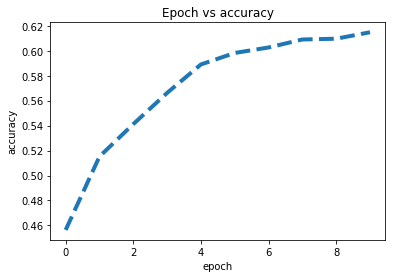

In [9]:
#Initialize the variables
init = tf.global_variables_initializer()

#set the training, validation, and testing data
train_set_data = []
train_set_labels = []
data, labels = lc.load_preprocessed_training_batch(1,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(2,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(3,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(4,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(5,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels

#print(len(train_set_data))

valid_set_data, valid_set_labels = lc.load_preprocessed_validation_batch(batch_size)
test_set_data, test_set_labels = lc.load_preprocessed_test_batch(batch_size)

acc_list = []
steps = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        start_time = time.time()
        #epoch training
        acc_t = 0
        for j in range(len(train_set_data)):
            #fetch batch
            batch_x = train_set_data[j]
            #print(batch_x)
            batch_y = train_set_labels[j]
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            
            acc_t += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc_t = acc_t/len(train_set_data)
        print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))
            
        #epoch validation
        acc = 0
        for j in range(len(valid_set_data)):
            #fetch batch
            batch_x = valid_set_data[j]
            batch_y = valid_set_labels[j]
            #run optimization
            acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc = acc/len(valid_set_data)
        print("step "+str(i)+", Accuracy valid= {:.3f}".format(acc))
        acc_list.append(acc)
        steps.append(i)
        
        print("--- %s seconds ---" % (time.time() - start_time))
        
        #step 10 accuracy test
        #if (i == 9):
        #    acc = 0
        #    for k in range(len(test_set_data)):
        #        #fetch batch
        #        batch_x = test_set_data[k]
        #        batch_y = test_set_labels[k]
        #        #run optimization
        #        acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        #
        #    acc = acc/len(test_set_data)
        #    print("step "+str(i)+", Accuracy test= {:.3f}".format(acc))
    
    print("Training finished!")
    
    acc = 0
    for k in range(len(test_set_data)):
        #fetch batch
        batch_x = test_set_data[k]
        batch_y = test_set_labels[k]
        #run optimization
        acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})

    acc = acc/len(test_set_data)
    print("Accuracy test= {:.3f}".format(acc))
    
    #print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy')